---
title: FLIGHT DELAY ANALYSIS
author: Sneha 
format:
    html:
        theme: Lumen
        toc: true
        code-fold: true
        
---

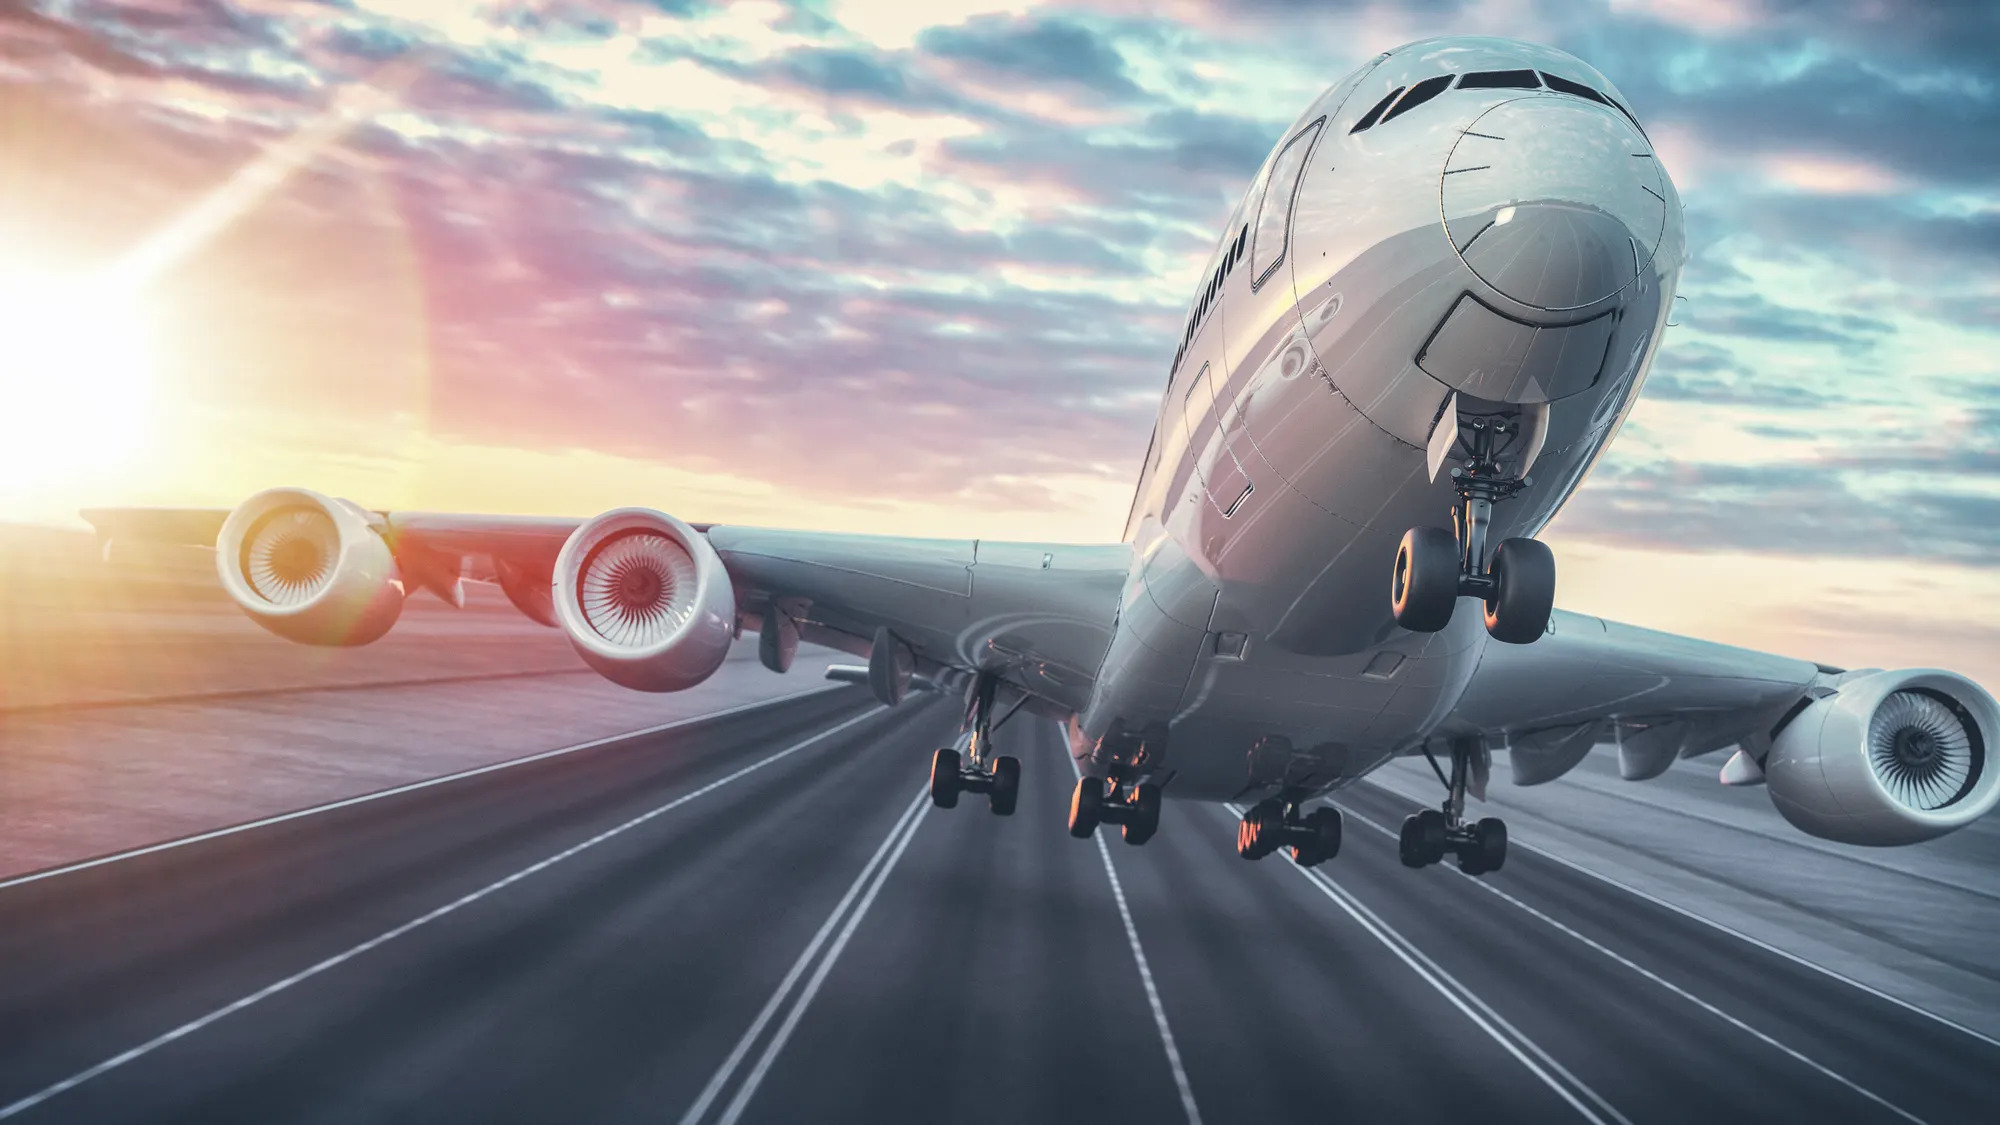

In [17]:
from PIL import Image
from IPython.display import display

img = Image.open('/Users/snehanarayanan/Downloads/flight.jpg')

display(img)

### Problem Statement:

> **Flight delays are a growing issue, causing significant inconvenience to passengers and economic losses to airlines.**

> **The rising demand for air travel, coupled with the increasing ratio of delay minutes to flights, necessitates accurate prediction models for flight delays.**

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf 

## LOADING THE DATASET

In [2]:
data = pd.read_csv('flights_sample_3m.csv')
data.head().T
data['AIRLINE'].unique()

array(['United Air Lines Inc.', 'Delta Air Lines Inc.',
       'Spirit Air Lines', 'Southwest Airlines Co.',
       'American Airlines Inc.', 'Republic Airline',
       'Alaska Airlines Inc.', 'JetBlue Airways', 'PSA Airlines Inc.',
       'Allegiant Air', 'ExpressJet Airlines LLC d/b/a aha!',
       'SkyWest Airlines Inc.', 'Endeavor Air Inc.', 'Envoy Air',
       'Frontier Airlines Inc.', 'Mesa Airlines Inc.', 'Horizon Air',
       'Hawaiian Airlines Inc.'], dtype=object)

- Removal of flight details which are cancelled or diverted
- Removal of rows which are not necessary for our analysis
- Creation of column for 'AIRCRAFT_SPEED'

In [3]:
data = data[data['CANCELLED']==0]
data = data[data['DIVERTED']==0]

data = data.drop(['FL_NUMBER', 'DIVERTED', 'CANCELLED', 'CANCELLATION_CODE'], axis = 1)
data['AIRCRAFT_SPEED'] = data['DISTANCE']/(data['AIR_TIME']/60)

In [4]:
data.isnull().sum()

FL_DATE                          0
AIRLINE                          0
AIRLINE_DOT                      0
AIRLINE_CODE                     0
DOT_CODE                         0
ORIGIN                           0
ORIGIN_CITY                      0
DEST                             0
DEST_CITY                        0
CRS_DEP_TIME                     0
DEP_TIME                         0
DEP_DELAY                        0
TAXI_OUT                         0
WHEELS_OFF                       0
WHEELS_ON                        2
TAXI_IN                          2
CRS_ARR_TIME                     0
ARR_TIME                         2
ARR_DELAY                        2
CRS_ELAPSED_TIME                 0
ELAPSED_TIME                     2
AIR_TIME                         2
DISTANCE                         0
DELAY_DUE_CARRIER          2379941
DELAY_DUE_WEATHER          2379941
DELAY_DUE_NAS              2379941
DELAY_DUE_SECURITY         2379941
DELAY_DUE_LATE_AIRCRAFT    2379941
AIRCRAFT_SPEED      

### **Merge the 'data' DataFrame with the 'airlines' DataFrame based on the airline code**
  
  >Rename the original column that had the full airline name as AIRLINE_NAME

### CREATING YEAR AND MONTH COLUMNS

In [5]:
data['FL_DATE'] = pd.to_datetime(data['FL_DATE'], errors='coerce')
data['FL_DATE']

0         2019-01-09
1         2022-11-19
2         2022-07-22
3         2023-03-06
4         2020-02-23
             ...    
2999995   2022-11-13
2999996   2022-11-02
2999997   2022-09-11
2999998   2019-11-13
2999999   2019-06-15
Name: FL_DATE, Length: 2913804, dtype: datetime64[ns]

In [6]:
data.loc[:, 'YEAR'] = data['FL_DATE'].dt.year

data.loc[:, 'MONTH'] = data['FL_DATE'].dt.month

print(data[['FL_DATE', 'YEAR', 'MONTH']].head())

     FL_DATE  YEAR  MONTH
0 2019-01-09  2019      1
1 2022-11-19  2022     11
2 2022-07-22  2022      7
3 2023-03-06  2023      3
4 2020-02-23  2020      2


In [7]:
data.isnull().sum()

FL_DATE                          0
AIRLINE                          0
AIRLINE_DOT                      0
AIRLINE_CODE                     0
DOT_CODE                         0
ORIGIN                           0
ORIGIN_CITY                      0
DEST                             0
DEST_CITY                        0
CRS_DEP_TIME                     0
DEP_TIME                         0
DEP_DELAY                        0
TAXI_OUT                         0
WHEELS_OFF                       0
WHEELS_ON                        2
TAXI_IN                          2
CRS_ARR_TIME                     0
ARR_TIME                         2
ARR_DELAY                        2
CRS_ELAPSED_TIME                 0
ELAPSED_TIME                     2
AIR_TIME                         2
DISTANCE                         0
DELAY_DUE_CARRIER          2379941
DELAY_DUE_WEATHER          2379941
DELAY_DUE_NAS              2379941
DELAY_DUE_SECURITY         2379941
DELAY_DUE_LATE_AIRCRAFT    2379941
AIRCRAFT_SPEED      

### creating a new dataframe to contain only delayed flights

In [8]:
flight_delay = data[data['ARR_DELAY']>=10]
flight_delay.isna().sum()

FL_DATE                         0
AIRLINE                         0
AIRLINE_DOT                     0
AIRLINE_CODE                    0
DOT_CODE                        0
ORIGIN                          0
ORIGIN_CITY                     0
DEST                            0
DEST_CITY                       0
CRS_DEP_TIME                    0
DEP_TIME                        0
DEP_DELAY                       0
TAXI_OUT                        0
WHEELS_OFF                      0
WHEELS_ON                       0
TAXI_IN                         0
CRS_ARR_TIME                    0
ARR_TIME                        0
ARR_DELAY                       0
CRS_ELAPSED_TIME                0
ELAPSED_TIME                    0
AIR_TIME                        0
DISTANCE                        0
DELAY_DUE_CARRIER          111541
DELAY_DUE_WEATHER          111541
DELAY_DUE_NAS              111541
DELAY_DUE_SECURITY         111541
DELAY_DUE_LATE_AIRCRAFT    111541
AIRCRAFT_SPEED                  0
YEAR          

### Understanding the inter-airline flight delay across United States airlines

In [11]:
net_delay = flight_delay.groupby('AIRLINE')[['ARR_DELAY']].count()
total_flights = data.groupby('AIRLINE')[['YEAR']].count()

percentage = pd.concat([net_delay,total_flights], axis = 1)
percentage.columns = ['net_delay', 'total_flights']
percentage.insert(loc = 2, column = 'percentage', value = 100*(percentage['net_delay']/percentage['total_flights']))
percentage['rank'] = percentage['percentage'].rank(ascending = False).astype(int)
percentage = percentage.sort_values(by = 'rank')
percentage = percentage.reset_index()
percentage

,AIRLINE,net_delay,total_flights,percentage,rank
0,JetBlue Airways,29553,109447,27.002111,1
1,Frontier Airlines Inc.,16712,62712,26.648807,2
2,Allegiant Air,13091,50179,26.088603,3
3,Spirit Air Lines,20615,93200,22.119099,4
4,ExpressJet Airlines LLC d/b/a aha!,3856,17951,21.480697,5
5,American Airlines Inc.,73864,371218,19.897742,6
6,Southwest Airlines Co.,107275,555869,19.298612,7
7,United Air Lines Inc.,47559,248270,19.156161,8
8,Mesa Airlines Inc.,11637,62477,18.626054,9
9,Alaska Airlines Inc.,17870,98294,18.180153,10


> Highest Delay Percentage: JetBlue Airways has the highest percentage of delayed arrivals (27.00%) among the airlines listed, indicating that it faces significant operational challenges in maintaining timely flights compared to its peers. This is closely followed by Frontier Airlines Inc. (26.65%) and Allegiant Air (26.09%).

> Overall Delay Trends: Southwest Airlines Co. and American Airlines Inc. have the highest total number of flights (555,869 and 371,218, respectively) but also exhibit substantial delays, suggesting that while they operate a larger volume of flights, they experience a considerable number of delays relative to their total operations.

## VISUALIZATION

### *1. Which airline has the highest percentage of delayed flights?*

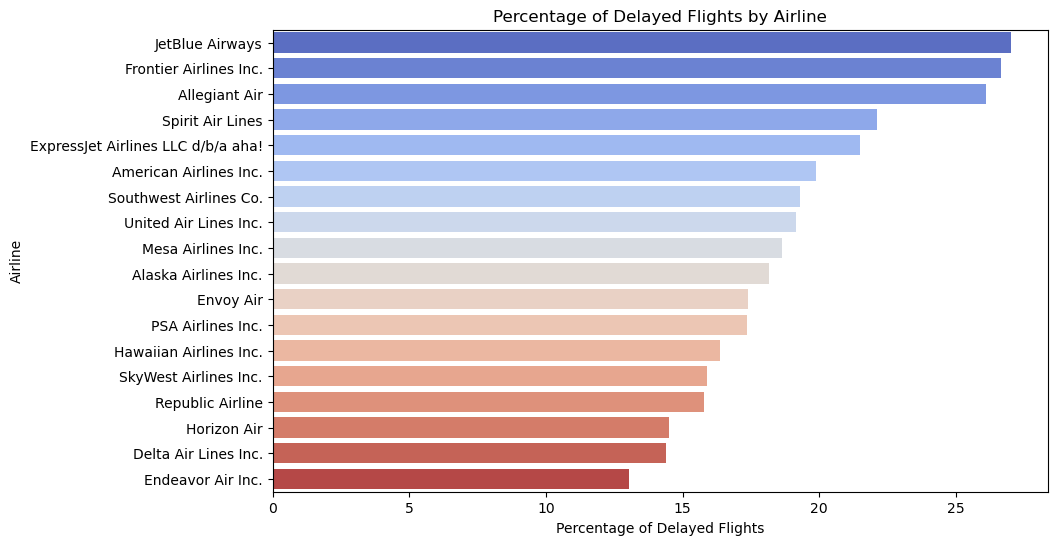

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(x='percentage', y='AIRLINE', data=percentage, palette='coolwarm')
plt.title('Percentage of Delayed Flights by Airline')
plt.xlabel('Percentage of Delayed Flights')
plt.ylabel('Airline')
plt.show()

**JetBlue Airways has the highest percentage of delayed flights among the airlines listed.** Frontier Airlines Inc. and Allegiant Air also have high delay rates.

### *2.What is the proportion of different delay causes (Carrier, Weather, NAS, Security, Late Aircraft)?*

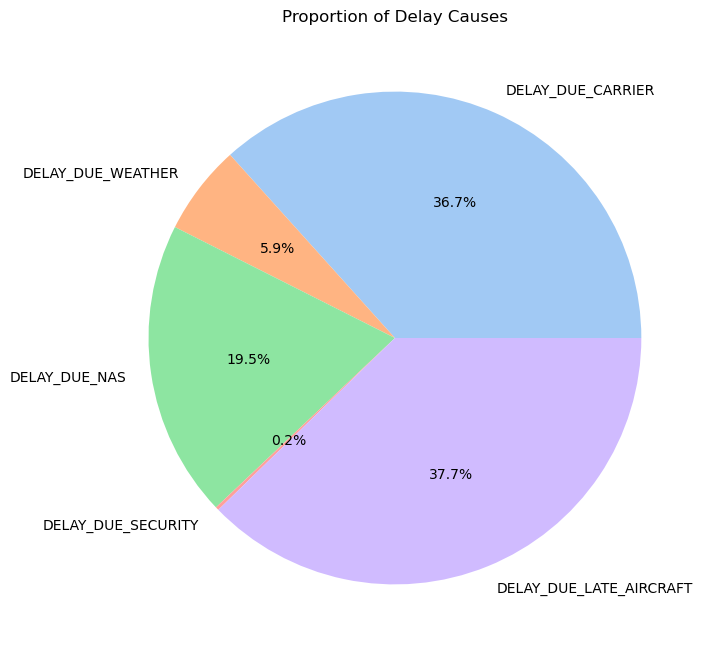

In [16]:
delay_columns = ['DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']
delay_sums = data[delay_columns].sum()

plt.figure(figsize=(8,8))
plt.pie(delay_sums, labels=delay_columns, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Proportion of Delay Causes')
plt.show()

* **Carrier delays and late aircraft delays are the two most common causes:** These two categories account for a significant portion of flight delays, suggesting that issues with airlines' operations and aircraft availability are major contributors to delays.

* **Weather delays are less frequent but still significant:** While weather-related delays are not as prevalent as carrier and late aircraft delays, they still constitute a notable portion of overall delays, highlighting the impact of weather conditions on flight operations.

### *3.How do flight delays vary by day of the week?*

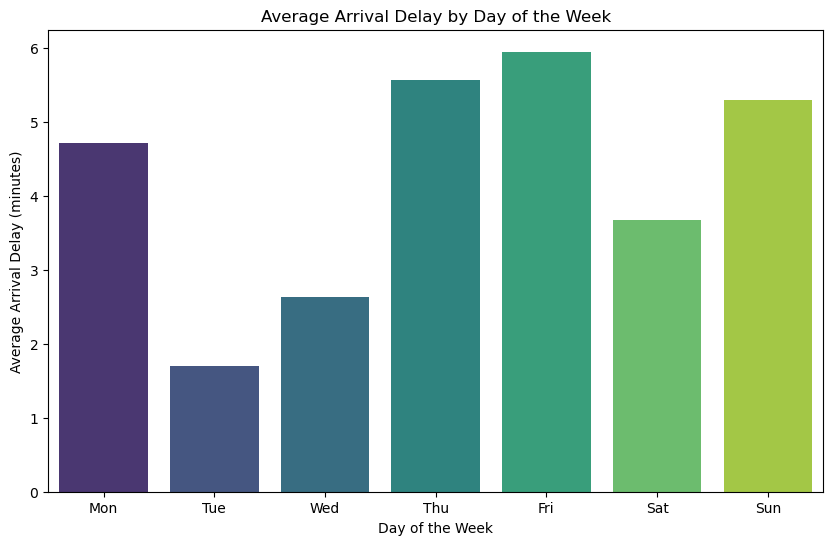

In [17]:
data['DAY_OF_WEEK'] = data['FL_DATE'].dt.dayofweek + 1  # +1 to make Monday = 1, ..., Sunday = 7

avg_delay_by_day = data.groupby('DAY_OF_WEEK')['ARR_DELAY'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_delay_by_day.index, y=avg_delay_by_day.values, palette='viridis')
plt.title('Average Arrival Delay by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Arrival Delay (minutes)')
plt.xticks(ticks=range(0, 7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

* **Weekends are more likely to have flight delays:** The chart reveals that flights on Friday, Saturday, and Sunday tend to have higher average arrival delays compared to weekdays. This might be attributed to factors such as increased air traffic, weather conditions, and operational challenges specific to weekends.
* **Tuesday and Wednesday are the most reliable days for flights:** Flights on Tuesday and Wednesday generally experience the lowest average arrival delays, suggesting that these days are more reliable for travelers in terms of on-time performance.

# 4.Correlation Heatmap of Flight Delay Factors

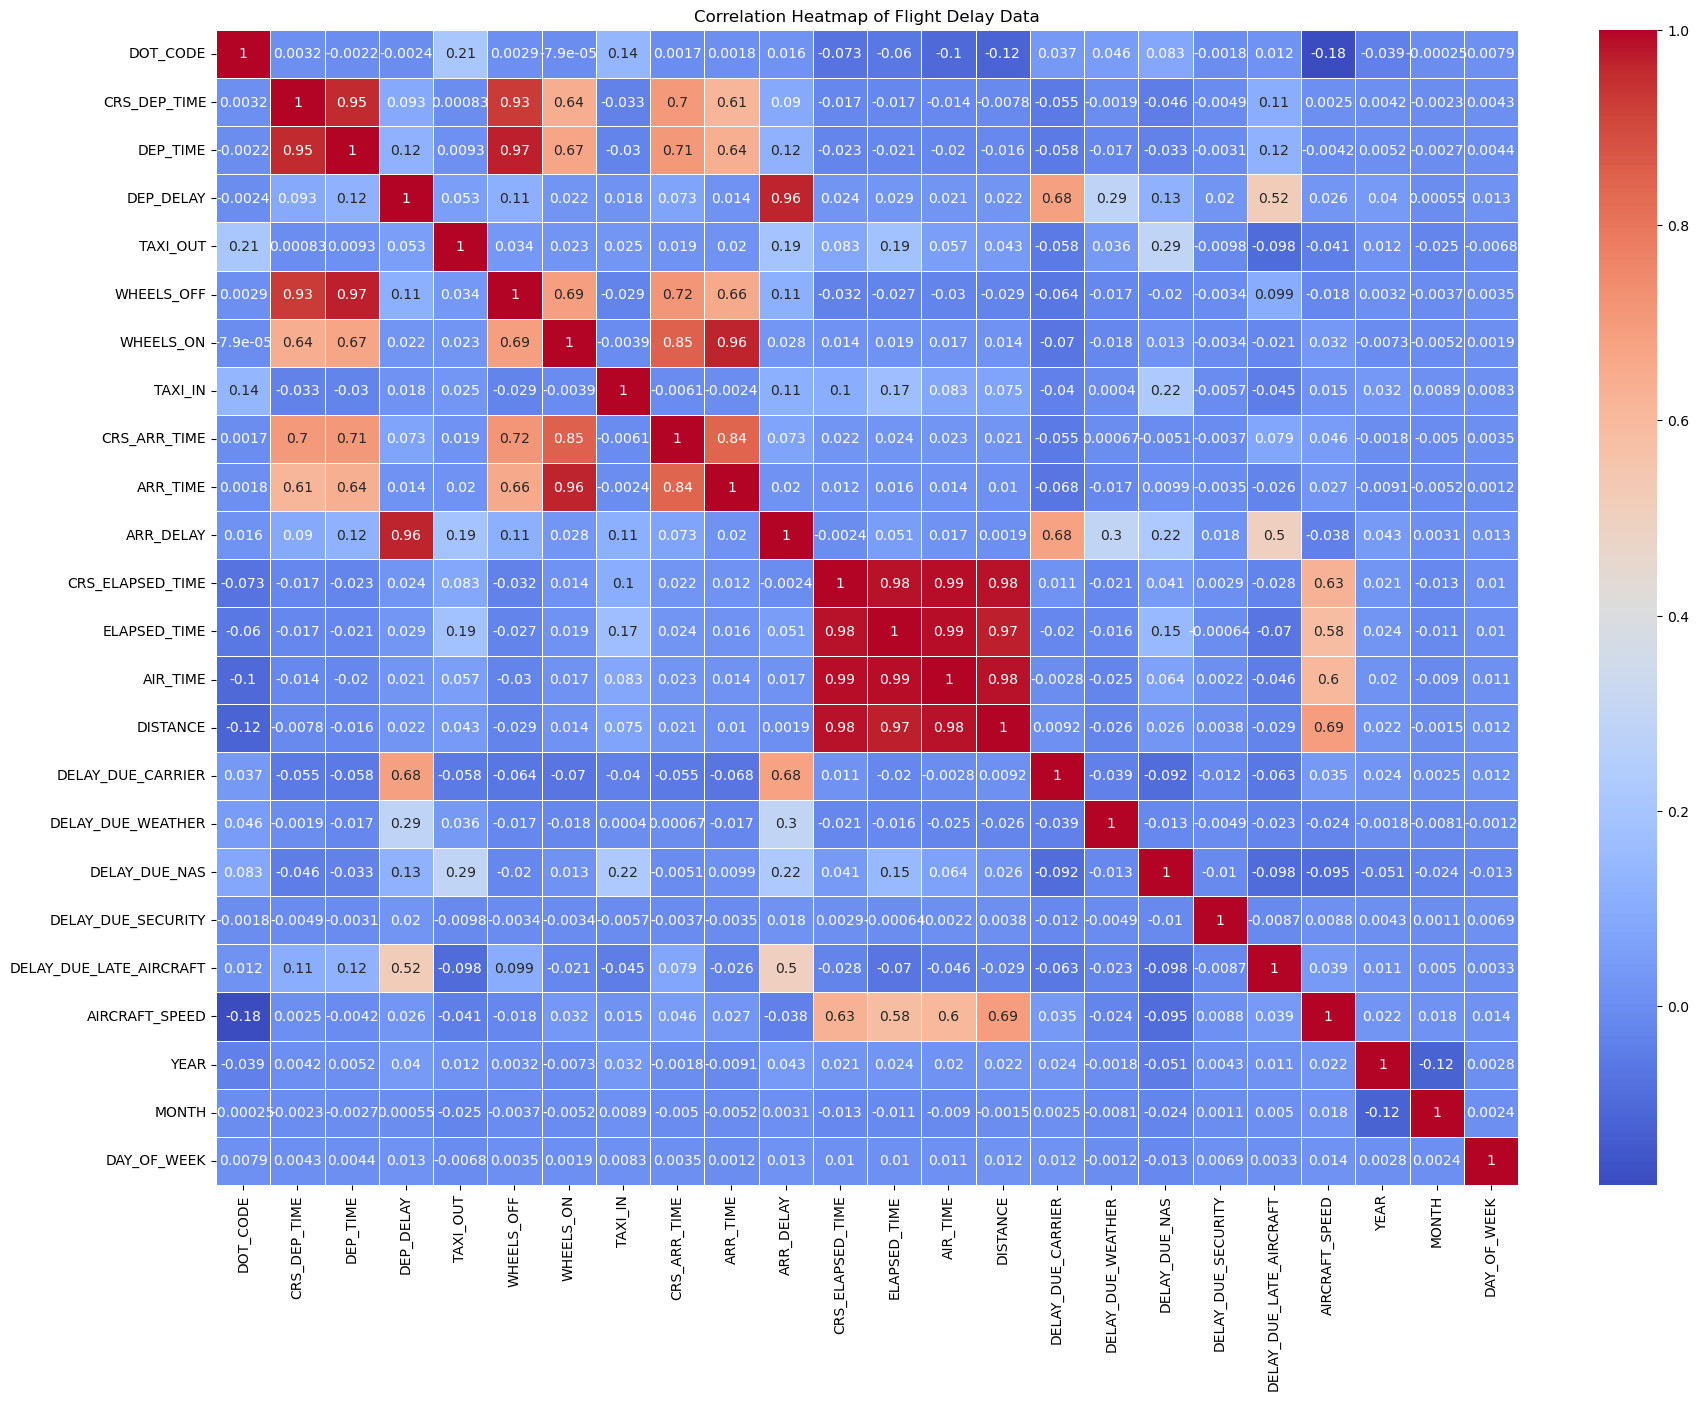

In [22]:
correlation_matrix = data.select_dtypes(include='number').corr()

plt.figure(figsize=(21, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Flight Delay Data')
plt.show()

# 5.Destination-Specific Delay Analysis

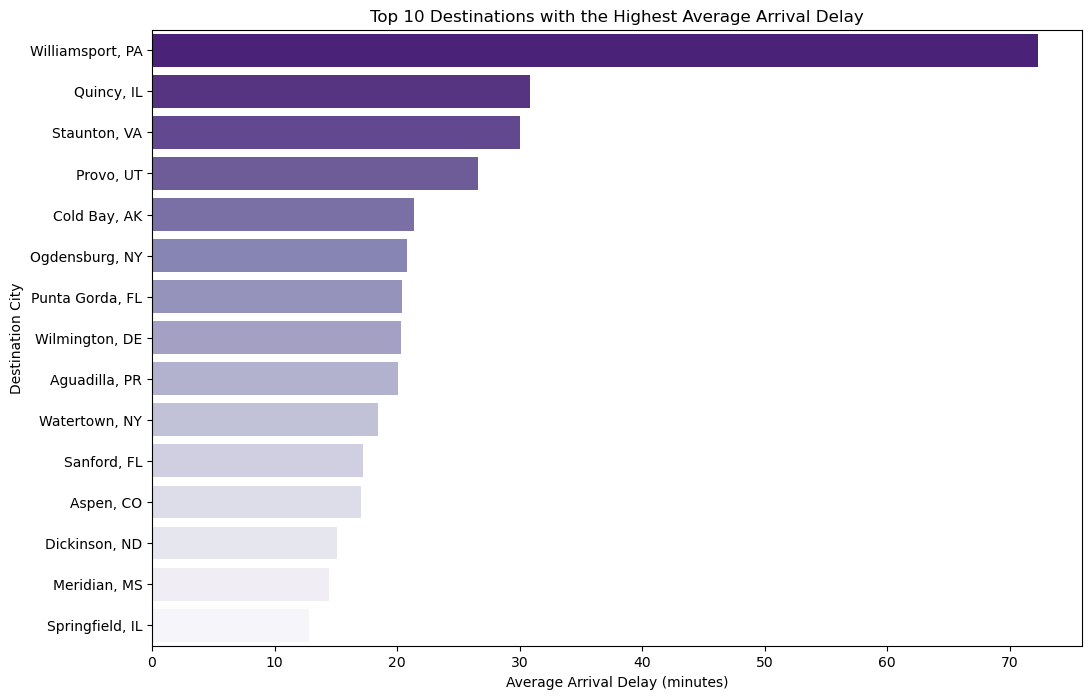

In [27]:
destination_delays = data.groupby('DEST_CITY')['ARR_DELAY'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 8))
sns.barplot(x=destination_delays, y=destination_delays.index, palette='Purples_r')
plt.title('Top 10 Destinations with the Highest Average Arrival Delay')
plt.xlabel('Average Arrival Delay (minutes)')
plt.ylabel('Destination City')
plt.show()

* **Williamsport, PA** is the destination with the highest average arrival delay, indicating that flights arriving at this airport frequently experience significant delays.

* **Several other destinations also have high delay rates:** Other destinations such as Quincy, IL, Staunton, VA, Provo, UT, and Cold Bay, AK also face frequent and lengthy delays, suggesting that they may have operational challenges or be located in regions prone to disruptions.


# 6.Airport-Specific Delays

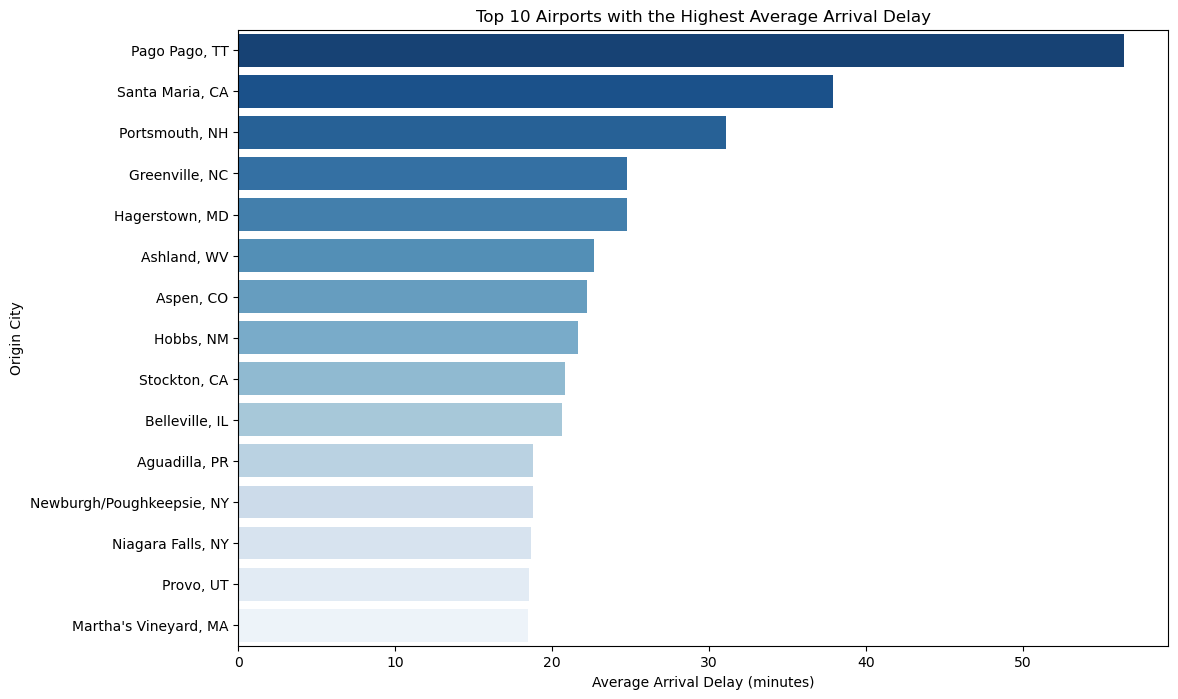

In [29]:
airport_delays = data.groupby('ORIGIN_CITY')['ARR_DELAY'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 8))
sns.barplot(x=airport_delays, y=airport_delays.index, palette='Blues_r')
plt.title('Top 10 Airports with the Highest Average Arrival Delay')
plt.xlabel('Average Arrival Delay (minutes)')
plt.ylabel('Origin City')
plt.show()

* **Pago Pago International Airport in American Samoa has the highest average arrival delay:** This airport faces significant challenges that contribute to frequent and lengthy delays, making it the most problematic airport for on-time arrivals.
* **Several smaller airports also experience high delay rates:** Other airports such as Santa Maria, Portsmouth, Greenville, and Hagerstown also have relatively high average arrival delays, indicating that they may face similar operational issues or be located in regions prone to weather-related disruptions.


# 7. Monthly Delay Trends for Top Delayed Airlines

In [ ]:
top_delayed_airlines = ['JetBlue Airways', 'Frontier Airlines Inc.', 'Allegiant Air']
filtered_data = data[data['AIRLINE'].isin(top_delayed_airlines)]

/Users/snehanarayanan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/snehanarayanan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/snehanarayanan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/snehanarayanan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

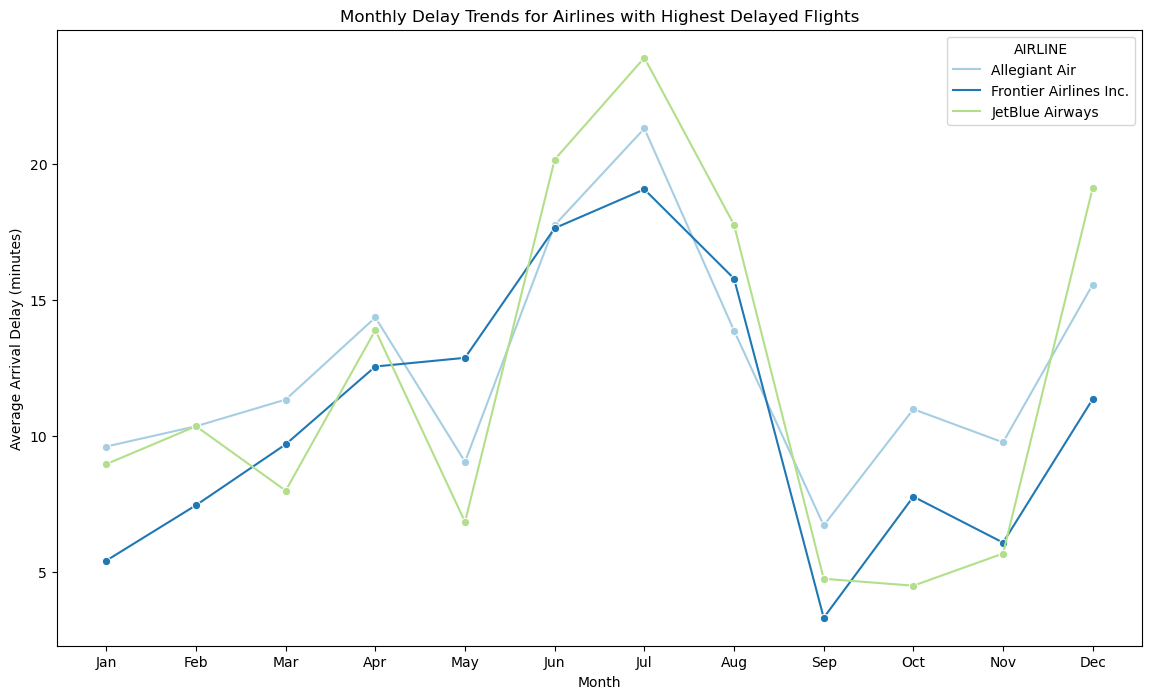

In [39]:
delay_by_month = filtered_data.groupby(['AIRLINE', 'MONTH'])['ARR_DELAY'].mean().reset_index()


plt.figure(figsize=(14, 8))
sns.lineplot(x='MONTH', y='ARR_DELAY', hue='AIRLINE', data=delay_by_month, marker='o', palette='Paired')
plt.title('Monthly Delay Trends for Airlines with Highest Delayed Flights')
plt.xlabel('Month')
plt.ylabel('Average Arrival Delay (minutes)')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

* **All three airlines experience significant seasonal fluctuations in delays:** The chart reveals that the average arrival delay for each airline varies considerably throughout the year, suggesting that factors such as weather patterns, air traffic volume, and operational challenges impact delays differently in different months.

# LINEAR REGRESSION

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
data.isnull().sum()

FL_DATE                          0
AIRLINE                          0
AIRLINE_DOT                      0
AIRLINE_CODE                     0
DOT_CODE                         0
ORIGIN                           0
ORIGIN_CITY                      0
DEST                             0
DEST_CITY                        0
CRS_DEP_TIME                     0
DEP_TIME                         0
DEP_DELAY                        0
TAXI_OUT                         0
WHEELS_OFF                       0
WHEELS_ON                        2
TAXI_IN                          2
CRS_ARR_TIME                     0
ARR_TIME                         2
ARR_DELAY                        2
CRS_ELAPSED_TIME                 0
ELAPSED_TIME                     2
AIR_TIME                         2
DISTANCE                         0
DELAY_DUE_CARRIER          2379941
DELAY_DUE_WEATHER          2379941
DELAY_DUE_NAS              2379941
DELAY_DUE_SECURITY         2379941
DELAY_DUE_LATE_AIRCRAFT    2379941
AIRCRAFT_SPEED      

In [14]:
data.drop(['DOT_CODE','DELAY_DUE_CARRIER','DELAY_DUE_WEATHER','DELAY_DUE_NAS','DELAY_DUE_SECURITY','DELAY_DUE_LATE_AIRCRAFT','CRS_ELAPSED_TIME'],axis=1,inplace=True)

In [10]:
flight_delay.drop(['DOT_CODE','DELAY_DUE_CARRIER','DELAY_DUE_WEATHER','DELAY_DUE_NAS','DELAY_DUE_SECURITY','DELAY_DUE_LATE_AIRCRAFT','CRS_ELAPSED_TIME'],axis=1,inplace=True)

/var/folders/73/0dj9qt2j6q55d7g3pl3ldw8h0000gn/T/ipykernel_73787/265295246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_delay.drop(['DOT_CODE','DELAY_DUE_CARRIER','DELAY_DUE_WEATHER','DELAY_DUE_NAS','DELAY_DUE_SECURITY','DELAY_DUE_LATE_AIRCRAFT','CRS_ELAPSED_TIME'],axis=1,inplace=True)


In [11]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
data[['WHEELS_ON', 'TAXI_IN', 'ARR_TIME', 'ARR_DELAY', 'ELAPSED_TIME', 'AIR_TIME', 'AIRCRAFT_SPEED']] = imputer.fit_transform(data[['WHEELS_ON', 'TAXI_IN', 'ARR_TIME', 'ARR_DELAY', 'ELAPSED_TIME', 'AIR_TIME', 'AIRCRAFT_SPEED']])

In [12]:
flight_delay.isnull().sum()

FL_DATE           0
AIRLINE           0
AIRLINE_DOT       0
AIRLINE_CODE      0
ORIGIN            0
ORIGIN_CITY       0
DEST              0
DEST_CITY         0
CRS_DEP_TIME      0
DEP_TIME          0
DEP_DELAY         0
TAXI_OUT          0
WHEELS_OFF        0
WHEELS_ON         0
TAXI_IN           0
CRS_ARR_TIME      0
ARR_TIME          0
ARR_DELAY         0
ELAPSED_TIME      0
AIR_TIME          0
DISTANCE          0
AIRCRAFT_SPEED    0
YEAR              0
MONTH             0
dtype: int64

In [13]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
data[['WHEELS_ON', 'TAXI_IN', 'ARR_TIME', 'ARR_DELAY', 'ELAPSED_TIME', 'AIR_TIME', 'AIRCRAFT_SPEED']] = imputer.fit_transform(data[['WHEELS_ON', 'TAXI_IN', 'ARR_TIME', 'ARR_DELAY', 'ELAPSED_TIME', 'AIR_TIME', 'AIRCRAFT_SPEED']])

In [19]:
X = data.drop(['ARR_DELAY', 'FL_DATE'], axis=1)
X = X.select_dtypes(include=[np.number])
Y = data['ARR_DELAY']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [14]:
X = flight_delay.drop(['ARR_DELAY', 'FL_DATE'], axis=1)
X = X.select_dtypes(include=[np.number])
Y = flight_delay['ARR_DELAY']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

#LINEAR REGRESSION

In [38]:
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)
Y_pred = lr_model.predict(X_test)

mse_all = mean_squared_error(Y_test, Y_pred)
r2_all = r2_score(Y_test, Y_pred)
print("All Features Model - MSE:", mse_all)
print("All Features Model - R2 Score:", r2_all)

All Features Model - MSE: 99.5993407883467
All Features Model - R2 Score: 0.9869563943831127


# RANDOM FOREST REGRESSOR

In [43]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=40)

rf_model.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=40)

In [53]:
Y_pred_rf = rf_model.predict(X_test)

In [55]:
mse_rf = mean_squared_error(Y_test, Y_pred_rf)
mae_rf = mean_absolute_error(Y_test, Y_pred_dt)
r2_rf = r2_score(Y_test, Y_pred_rf)
print("Random Forest Model - MSE:", mse_rf)
print("Random Forest Model - MAE:", mae_rf)
print("Random Forest Model - R2 Score:", r2_rf)

Random Forest Model - MSE: 68.87800160364422
Random Forest Model - MAE: 8.651862009126052
Random Forest Model - R2 Score: 0.9909796843886101


In [46]:
X = data.drop(['ARR_DELAY', 'FL_DATE'], axis=1)
Y = data['ARR_DELAY']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, Y_train)

Y_pred_dt = dt_model.predict(X_test)

rmse_dt = np.sqrt(mean_squared_error(Y_test, Y_pred_dt))
mae_dt = mean_absolute_error(Y_test, Y_pred_dt)
r2_dt = r2_score(Y_test, Y_pred_dt)

print("Decision Tree Model - RMSE:", rmse_dt)
print("Decision Tree Model - MAE:", mae_dt)
print("Decision Tree Model - R2 Score:", r2_dt)

Decision Tree Model - RMSE: 11.844737449773435
Decision Tree Model - MAE: 8.651862009126052
Decision Tree Model - R2 Score: 0.9816264924429801


In this analysis of flight delay data, three machine learning models—linear regression, decision trees, and random forest—were used to predict arrival delays.

**Linear Regression Model**: While the model performed reasonably well (MSE of 99.60, R² = 0.987), it struggled with capturing complex interactions in the data, limiting its precision.

**Decision Tree Model:** With an RMSE of 11.84 and R² of 0.982, this model provided good predictive power but faced potential overfitting, affecting its generalization.

**Random Forest Regressor:** This model delivered the best results (MSE of 68.88, R² = 0.991), effectively capturing nonlinear relationships and minimizing overfitting by averaging predictions across multiple decision trees.

# Conclusion:

**Key Insights:** The analysis reveals that delays are influenced by multiple factors, with JetBlue Airways having the highest percentage of delayed flights at 27.00%, followed closely by Frontier Airlines Inc. and Allegiant Air. The root causes of delays, as shown in the delay proportions plot, are varied, with Carrier and Late Aircraft delays being the largest contributors.

**Model Performance:** Of the three models tested, the Random Forest Regressor provided the best predictive accuracy, indicating that complex models are necessary to capture the intricate patterns of flight delays. The linear regression model, while useful for understanding broad trends, underperformed relative to the others, especially in the presence of non-linear relationships.